# Avaliação das previsões geradas pelo modelo ARIMA 

Neste trabalho é avaliada a performance do modelo ARIMA para a previsão da média de casos de 7 dias utilizando dados fora do período de treino do modelo. No trabalho anterior foram testadas modelos AR e MA, mas, como o ARIMa teve desempenho melhor na maioria dos países ele foi o selecionado para prosseguir nesta fase do projeto.

## Bibliotecas necessárias

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

## Leitura dos dados

In [2]:
dir_covid_data = '../../datalake/silver/covid_data/'
covid_file = f'{dir_covid_data}/full_grouped_filtro_1.csv'
covid_data = pd.read_csv(covid_file)
covid_data.drop('Unnamed: 0', axis=1, inplace=True)
covid_data['Date'] = pd.to_datetime(covid_data['Date'])
covid_data.set_index('Date', inplace=True)

# Dados necessários para o ARIMA
reg_data = covid_data[['Country/Region', 'New cases']].dropna() # Remoção de valores NaN

Função para gerar previsões com o modelo ARIMA

In [3]:
def arima_model(train_data, test_data, p=0, d=0, q=0, country='', model_name='',
                horizon=1):
    model = ARIMA(train_data['New cases'], order=(p, d, q))
    model = model.fit()
    fcst = []
    data = train_data.copy()

    for i in range(len(test_data)):
        fcst.append([data.index[-1], *model.forecast(horizon).values[:]])
        data = pd.concat([data, test_data.iloc[i:i+1]])
        model_test = ARIMA(data['New cases'], order=(p, d, q))
        model = model_test.smooth(model.params)

    fcst = pd.DataFrame(fcst)
    fcst.columns = ['fcst_date', *[f'h{i}' for i in range(1, horizon+1)]]
    fcst.set_index('fcst_date', inplace=True)
    fcst[f'{horizon}day_average'] = fcst.mean(axis=1)
    data_fcst = data.loc[fcst.index].rolling(horizon).mean().shift(-horizon).dropna()
    fig, ax = plt.subplots(1)
    fcst.loc[data_fcst.index][f'{horizon}day_average'].plot(ax=ax, label='forecast')
    data_fcst.plot(ax=ax)
    plt.legend()
    fcst = fcst.loc[data_fcst.index]
    fcst[f'{horizon}day_average_observed'] = data_fcst
    return fcst
    

## Gerando Previsões

### Argentina

In [4]:
reg_data_ar = reg_data[reg_data['Country/Region'] == 'Argentina']
reg_data_ar = reg_data_ar[['New cases']]
reg_data_ar = reg_data_ar.loc[reg_data_ar.ne(0).idxmax()[0]:]
train_data = reg_data_ar.iloc[:103]
test_data = reg_data_ar.iloc[103:]

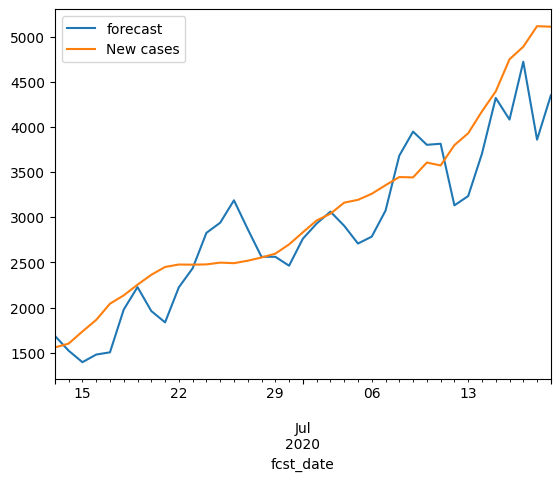

In [7]:
fcst_ar = arima_model(train_data, test_data,
                      p=3, d=2, q=1, 
                      model_name='ARIMA',
                      country='Argentina', 
                      horizon=7)

In [8]:
fcst_ar

,h1,h2,h3,h4,h5,h6,h7,7day_average,7day_average_observed
fcst_date,,,,,,,,,
2020-06-13,1541.725281,1592.671960,1636.738993,1689.019752,1735.651563,1783.687240,1831.335493,1687.261469,1558.428571
2020-06-14,1409.105753,1448.005992,1496.095045,1519.697613,1558.968793,1595.534444,1632.901169,1522.901258,1601.142857
2020-06-15,1305.870349,1349.958744,1370.315668,1391.755264,1421.534550,1450.319998,1478.055909,1395.401497,1735.142857
2020-06-16,1398.110782,1419.823029,1442.362169,1478.182354,1509.266854,1539.909889,1570.221403,1479.696640,1863.428571
2020-06-17,1416.210879,1438.648348,1474.386050,1505.017389,1535.487959,1565.581395,1596.312436,1504.520637,2042.714286
2020-06-18,1821.568989,1868.084659,1907.459924,1985.969682,2034.345924,2088.195358,2141.146569,1978.110158,2135.285714
2020-06-19,2036.600695,2080.719137,2163.076928,2232.594296,2294.489643,2357.614814,2422.685208,2226.825817,2253.285714
2020-06-20,1796.172792,1870.521532,1933.541336,1959.739013,2009.278327,2057.169564,2105.419992,1961.691794,2362.857143
2020-06-21,1718.443724,1777.183034,1799.908042,1830.368484,1870.998664,1910.067571,1947.386627,1836.336592,2449.714286


In [9]:
fcst_ar.to_csv('forecast_arima_argentina_7days_20200613-20200719.csv')

### México

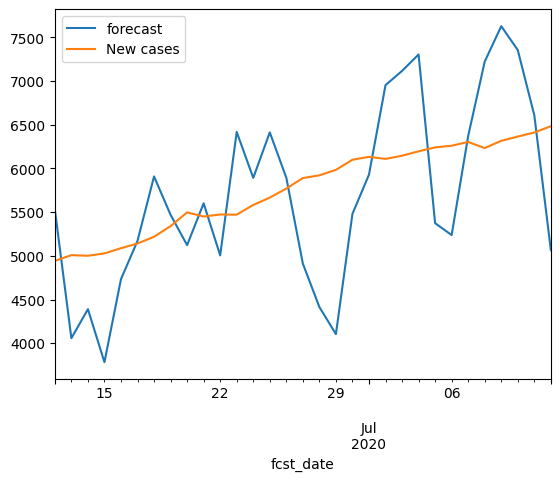

In [8]:
reg_data_mx = reg_data[reg_data['Country/Region'] == 'Mexico']
reg_data_mx = reg_data_mx[['New cases']]
reg_data_mx = reg_data_mx.loc[reg_data_mx.ne(0).idxmax()[0]:]
train_data = reg_data_mx.iloc[:106]
test_data = reg_data_mx.iloc[106:]
fcst_mx = arima_model(train_data, test_data, p=2, d=2, q=1, model_name='ARIMA', country='México', horizon=14
                      )

### Chile

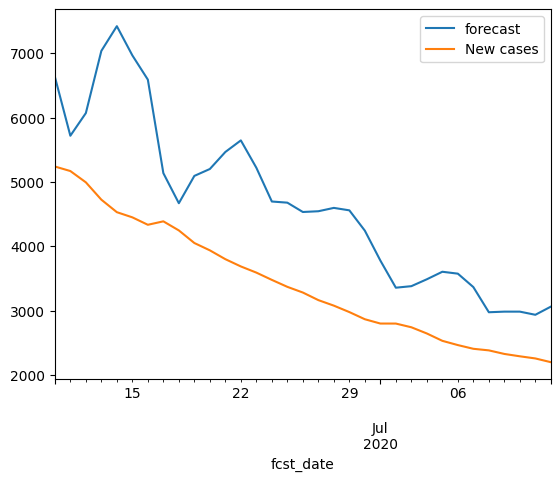

In [9]:
reg_data_ch = reg_data[reg_data['Country/Region'] == 'Chile']
reg_data_ch = reg_data_ch[['New cases']]
reg_data_ch = reg_data_ch.loc[reg_data_ch.ne(0).idxmax()[0]:]
train_data = reg_data_ch.iloc[:109]
test_data = reg_data_ch.iloc[109:]
fcst_ch = arima_model(train_data, test_data, 
                      p=4, d=2, q=1, 
                      model_name='ARIMA',
                      country='Chile', 
                      horizon=14)

### Equador

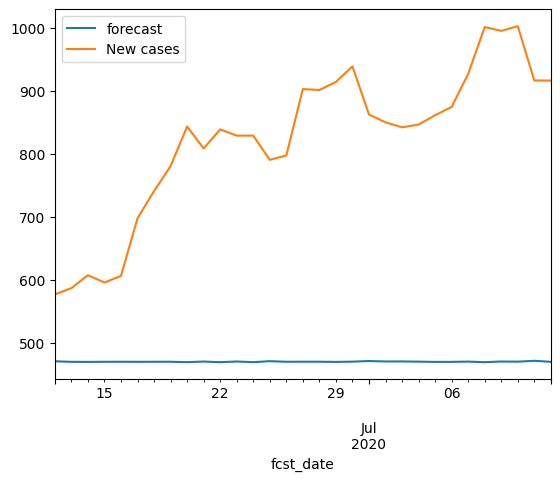

In [10]:
reg_data_eq = reg_data[reg_data['Country/Region'] == 'Ecuador']
reg_data_eq = reg_data_eq[['New cases']]
reg_data_eq = reg_data_eq.loc[reg_data_eq.ne(0).idxmax()[0]:]
train_data = reg_data_eq.iloc[:104]
test_data = reg_data_eq.iloc[104:]
fcst_eq = arima_model(train_data, test_data, p=1, q=1, model_name='ARIMA', country='Equador', horizon=14)


### Espanha

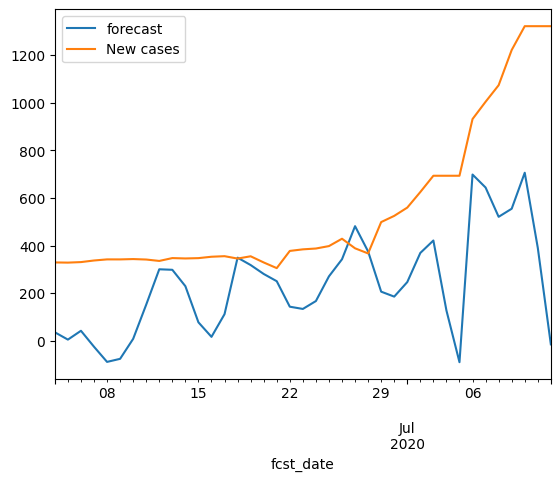

In [11]:
reg_data_es = reg_data[reg_data['Country/Region'] == 'Spain']
reg_data_es = reg_data_es[['New cases']]
reg_data_es = reg_data_es.loc[reg_data_es.ne(0).idxmax()[0]:]
train_data = reg_data_es.iloc[:125]
test_data = reg_data_es.iloc[125:]
fcst_es = arima_model(train_data, test_data,
                      p=3, d=2, q=2, 
                      model_name='ARIMA', 
                      country='Espanha', 
                      horizon=14)